In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

digits=load_digits()
k=10
iterations=100

# Que 2. K-center
•Implement k-centerfrom scratch for the same dataset, k = 10nal.

•What is the k-centerobjective when you terminate?

•Create a 10 x 10 matrix –the (i, j) entry contains number of points that simultaneously belong to cluster-iin k-means and cluster-j in kcenter.

Objective value:
 50.941142507800116

fig 3


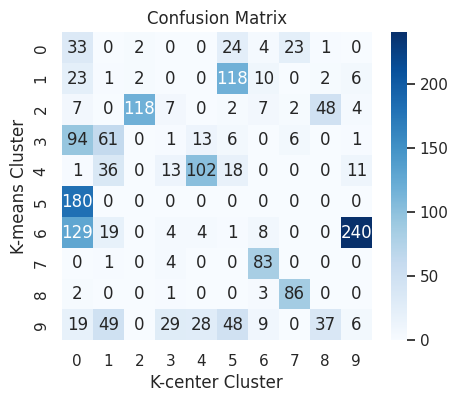

In [57]:
def k_center(data,k):
  centers=[data[0]]
  for i in range(1, k):
    dists=np.array([min([np.linalg.norm(x-c) for c in centers]) for x in data])
    new_center=data[np.argmax(dists)]
    centers.append(new_center)
  labels=np.argmin(np.linalg.norm(data[:,np.newaxis]-centers, axis=2), axis=1)
  obj_value=np.max(np.array([min([np.linalg.norm(x-c) for c in centers]) for x in data]))
  return centers, labels, obj_value

def k_mean(digits,k,initial_centers,iterations):
  centers = digits[initial_centers]
  for i in range(iterations):
    labels = np.argmin(np.linalg.norm(digits[:,np.newaxis,:]-centers, axis=2), axis=1)
    new_centers = np.array([digits[labels==j].mean(axis=0) for j in range(k)])
    if np.allclose(centers,new_centers):
      break
    centers = new_centers
  obj_value = np.sum(np.min(np.linalg.norm(digits[:,np.newaxis,:]-centers,axis=2),axis=1))
  return centers,labels,obj_value

centers,labels,obj_value=k_center(digits.data,k)
print("Objective value:\n",obj_value)

initial_centers = np.random.choice(digits.data.shape[0],k,replace=False)
kmeans_centers,kmeans_labels,obj_val_kmeans=k_mean(digits.data,k,initial_centers,iterations)
kcenter_centers,kcenter_labels,obj_val_kcenter=k_center(digits.data,k)

# confusion_matrix = np.zeros((k, k))
# for i in range(k):
#     for j in range(k):
#         confusion_matrix[i, j] = np.sum(np.logical_and(kmeans_labels==i,kcenter_labels==j))

# plt.imshow(confusion_matrix, cmap='Blues')
# plt.colorbar()
# plt.show()

print('\nfig 3')
cm=confusion_matrix(kmeans_labels,kcenter_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('K-center Cluster')
plt.ylabel('K-means Cluster')
plt.title('Confusion Matrix')
plt.show()